In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn import metrics
import math
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

In [2]:
dim = 128
dataset = pd.read_csv('./health-dataset/word2vec.csv', names = [i for i in range(dim)])

In [3]:
pca = PCA(n_components=2)
dataset_2D = pca.fit_transform(dataset)

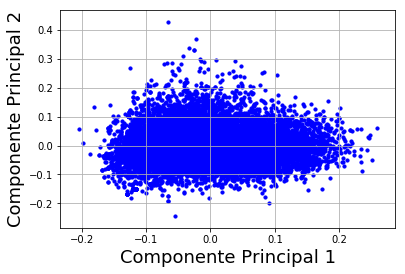

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 18)
ax.set_ylabel('Componente Principal 2', fontsize = 18)

ax.scatter(dataset_2D[:,0], dataset_2D[:,1], c = 'blue', s = 10)
ax.grid()
plt.savefig('pca_2d.eps', format='eps', dpi=90)

In [6]:
pca.explained_variance_ratio_.sum()

0.07078473817226949

In [7]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.013595,-0.068772,-0.013126,0.006024,0.037922,-0.020872,-0.010325,0.008019,0.008064,0.011381,...,-0.020965,0.062473,-0.000060,-0.062621,-0.019586,0.046007,0.003811,0.011133,-0.040208,-0.041968
1,0.025009,-0.025586,0.012237,0.020567,0.014523,-0.018705,-0.058395,0.028054,-0.032362,0.020582,...,-0.034977,0.030475,0.038899,0.016926,-0.000666,0.007311,0.001348,0.008414,-0.013927,0.002399
2,0.031544,-0.025882,-0.060617,0.035992,0.037742,-0.021132,-0.041023,0.011076,0.003247,0.014427,...,-0.000146,0.000293,0.029334,-0.005735,-0.025683,0.028694,0.028692,0.049043,-0.011250,-0.029423
3,0.058714,-0.080251,-0.026101,0.060461,0.016714,-0.005205,-0.037441,0.051472,-0.063505,0.003247,...,-0.021879,0.017103,0.016472,-0.004953,-0.001521,-0.018822,0.020216,0.025708,-0.016543,0.012973
4,0.023366,-0.065667,-0.015601,0.022602,0.030365,-0.060590,-0.071055,-0.008641,-0.018728,0.042880,...,0.014219,0.051613,0.027316,-0.030006,-0.028209,0.064256,-0.019291,0.003725,-0.049937,-0.015975


In [8]:
#dataset = remove_outliers(dataset,3)

In [80]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

For n_clusters = 2 The average silhouette_score is : 0.03918908871519185
For n_clusters = 3 The average silhouette_score is : -0.004389174185784399
For n_clusters = 4 The average silhouette_score is : -0.002156859162783735
For n_clusters = 5 The average silhouette_score is : 0.0011777185721962005
For n_clusters = 6 The average silhouette_score is : 0.0021493093403085178
For n_clusters = 7 The average silhouette_score is : 0.0037581958455215696
For n_clusters = 8 The average silhouette_score is : -0.009461286549330873
For n_clusters = 9 The average silhouette_score is : -0.011281793435476951
For n_clusters = 10 The average silhouette_score is : -0.008571331516590976
For n_clusters = 11 The average silhouette_score is : -0.018942889317498914
For n_clusters = 12 The average silhouette_score is : -0.0063769646561253205
For n_clusters = 13 The average silhouette_score is : -0.014338183223003712
For n_clusters = 14 The average silhouette_score is : -0.016792104119536518
For n_clusters = 15 T

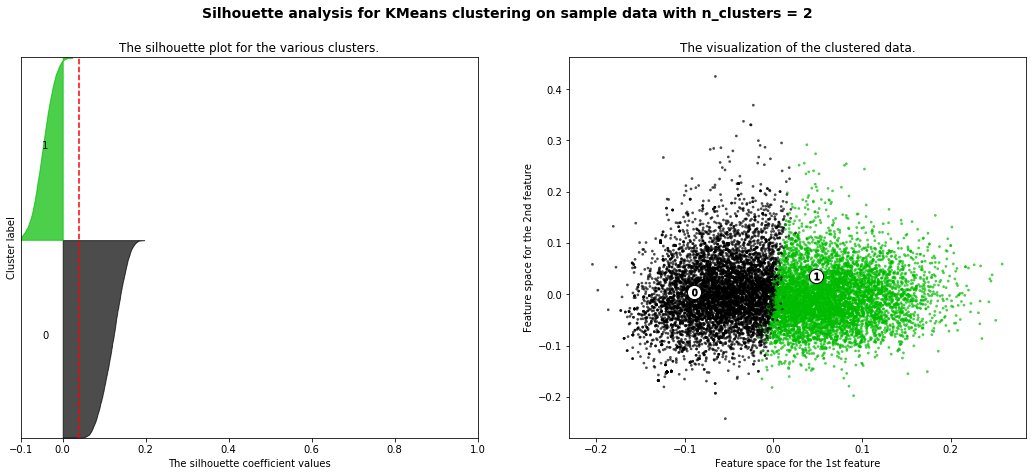

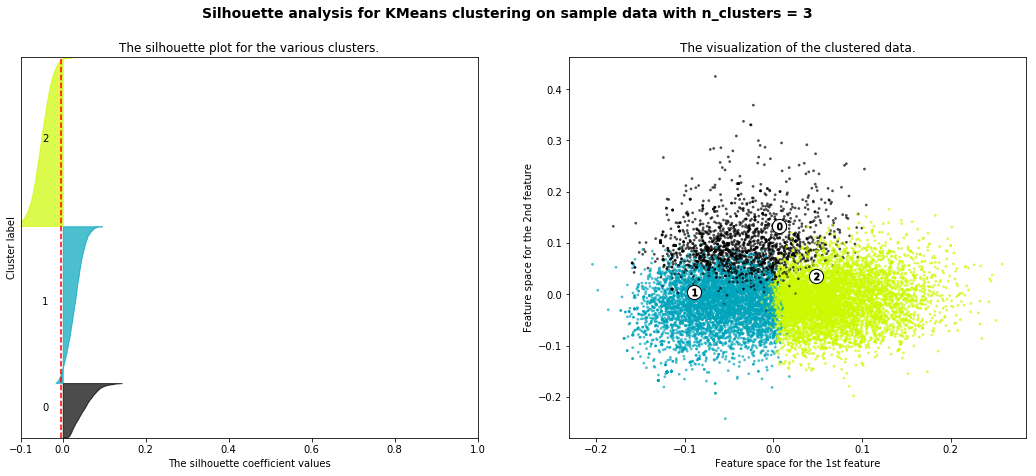

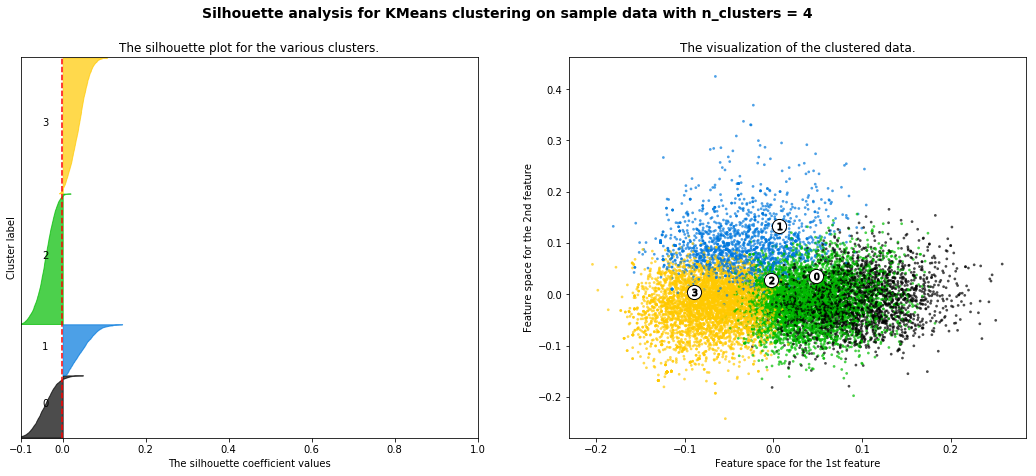

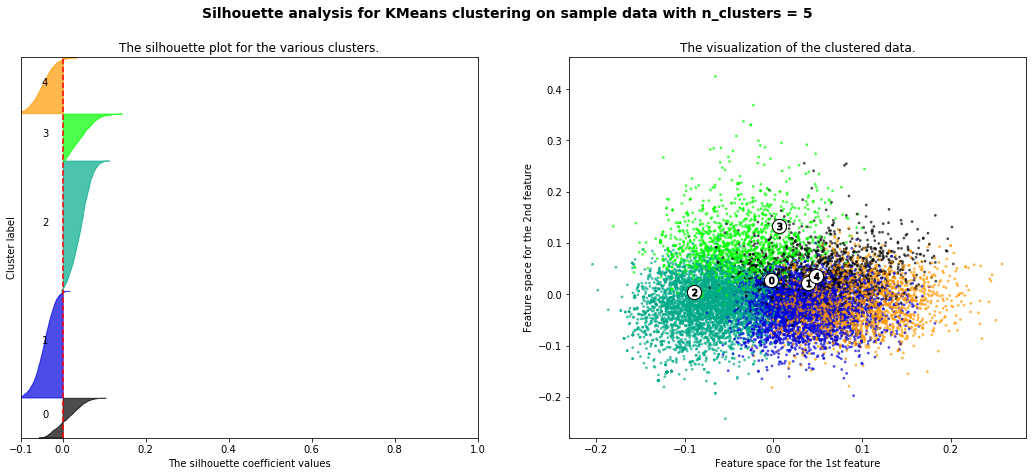

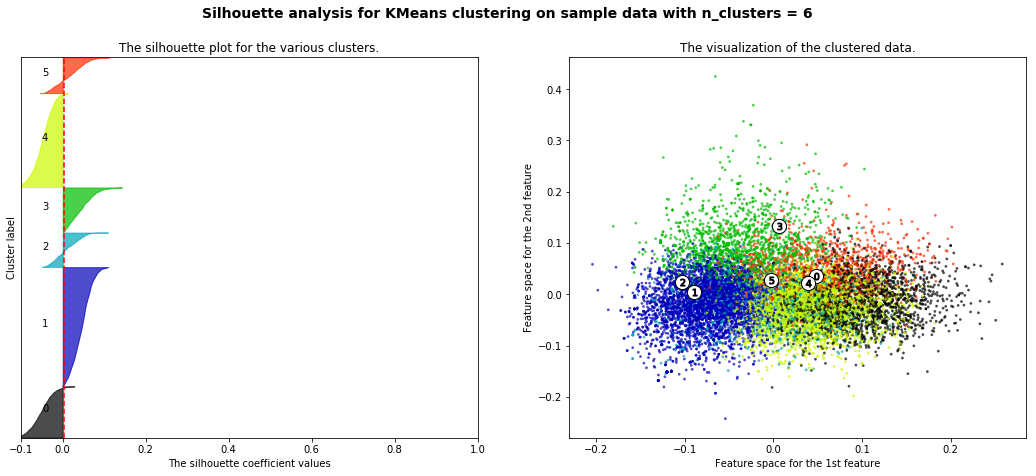

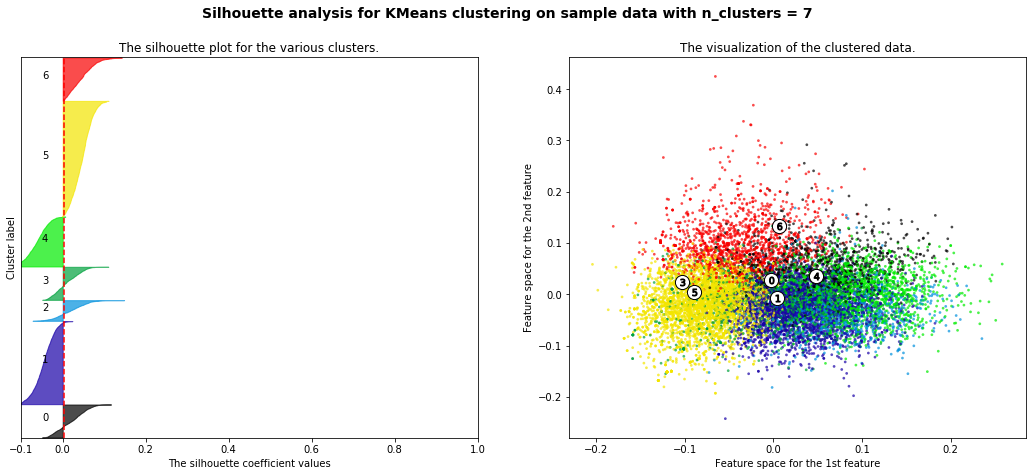

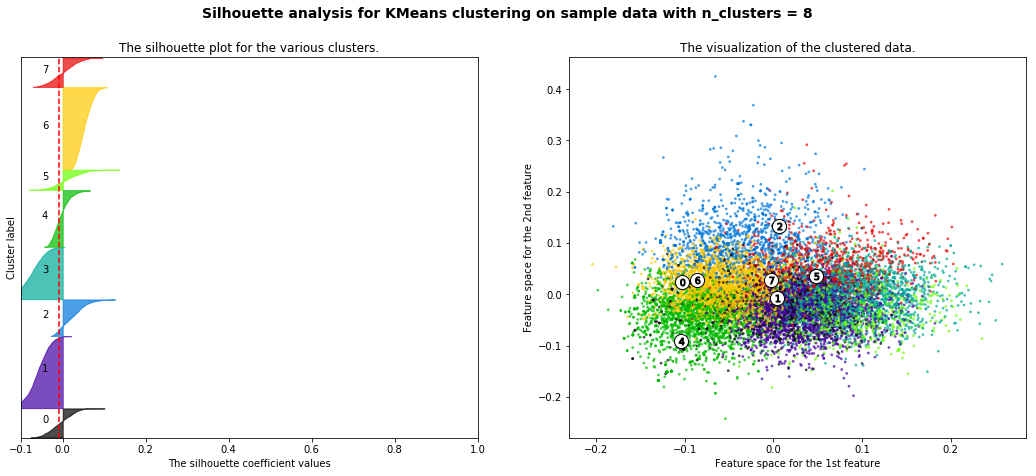

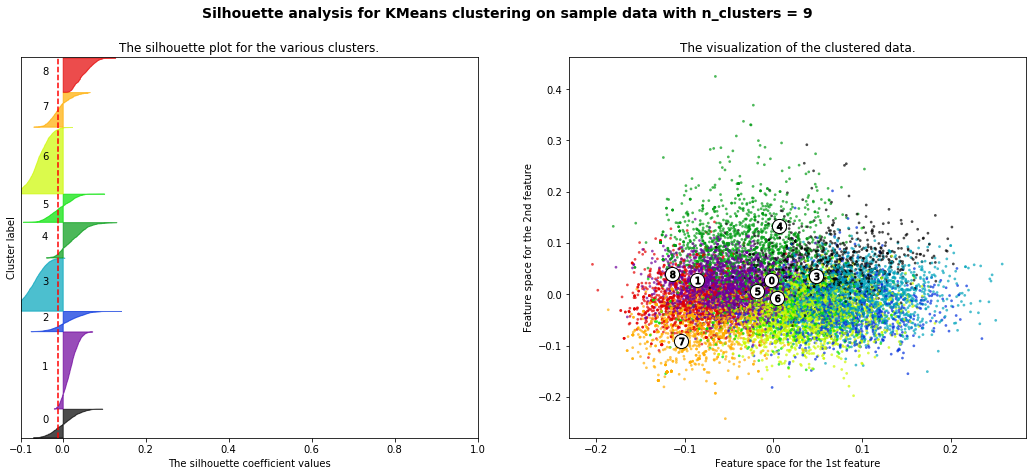

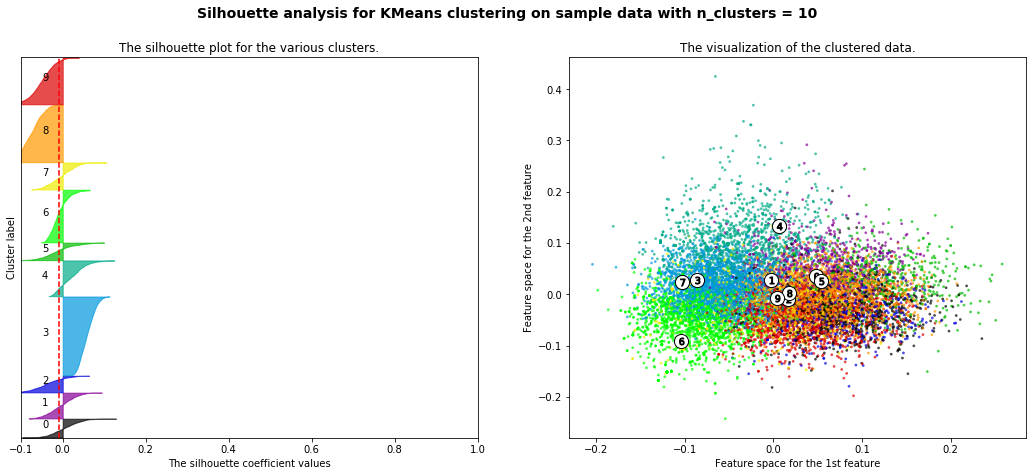

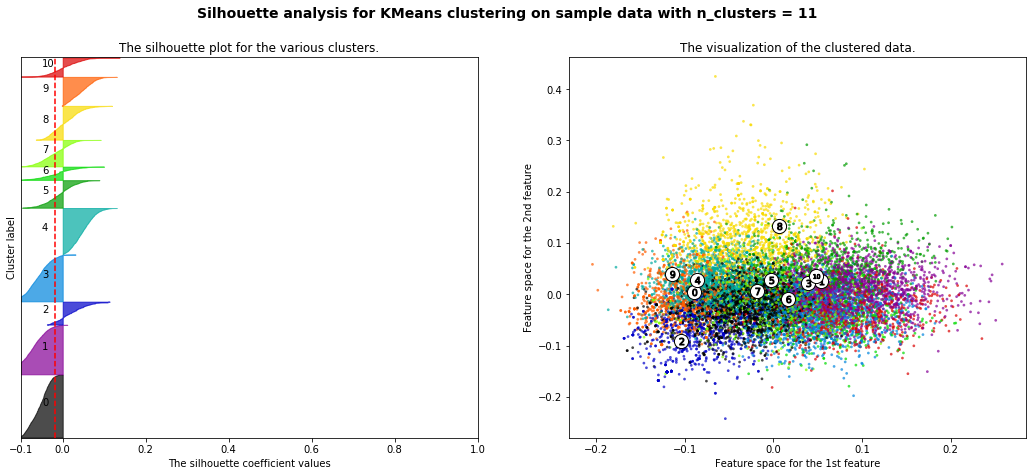

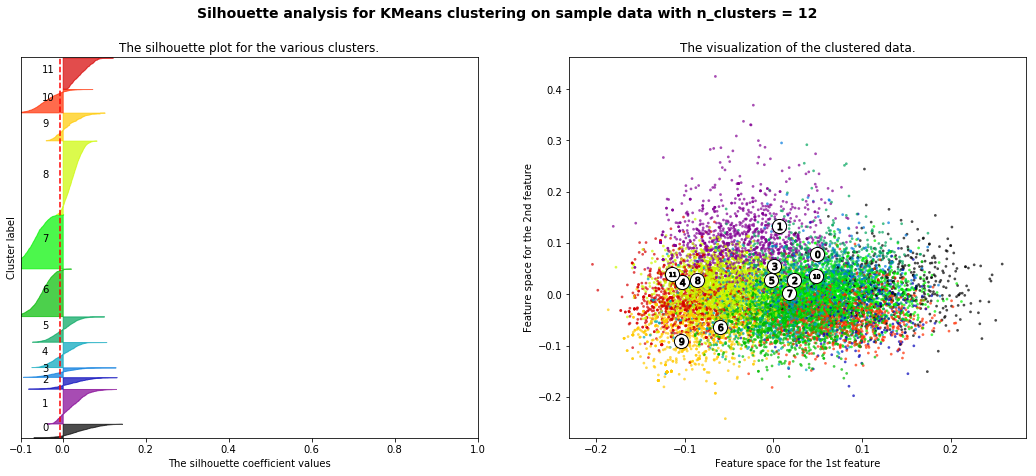

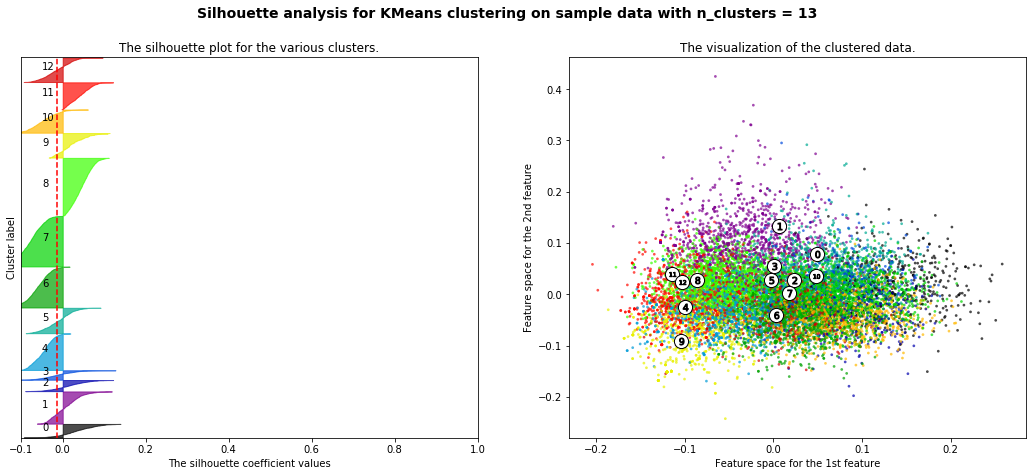

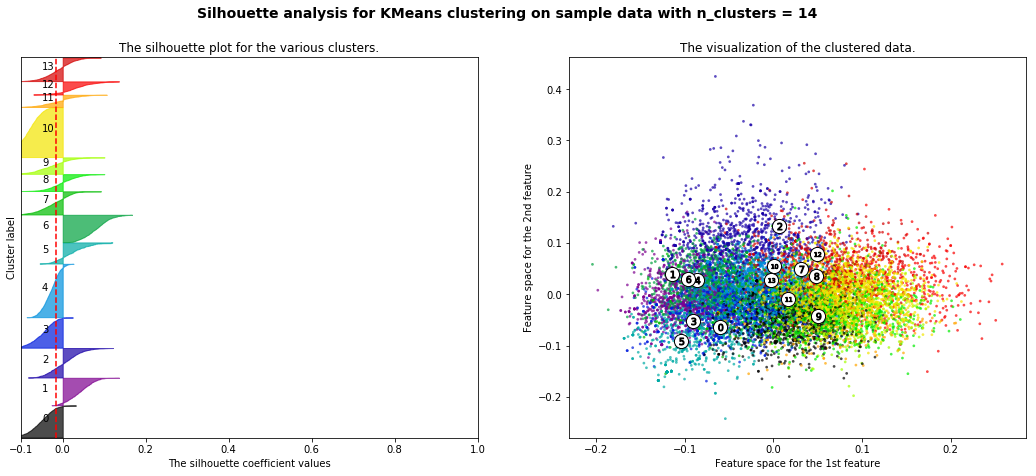

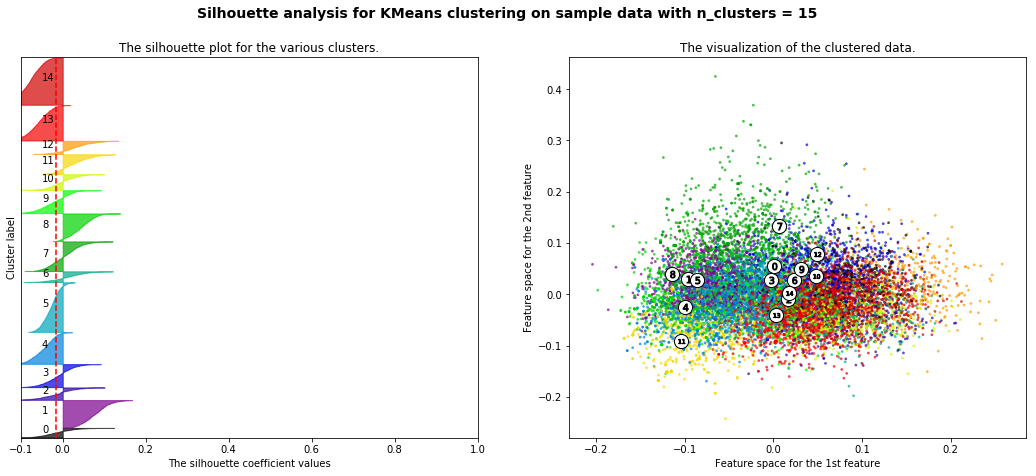

In [81]:
sse = {}
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, n_jobs=4, random_state=10).fit(dataset)
    cluster_labels = clusterer.labels_
    
    sse[n_clusters] = clusterer.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset) + (n_clusters + 1) * 10])


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dataset_2D[:,0], dataset_2D[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    closest, distances = metrics.pairwise_distances_argmin_min(clusterer.cluster_centers_, dataset)

    for i in range(len(closest)):
        ax2.scatter(dataset_2D[closest[i],0], dataset_2D[closest[i],1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
        ax2.scatter(dataset_2D[closest[i],0], dataset_2D[closest[i],1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [82]:
list(sse.values())[:5]

[1738.581886383941,
 1713.97742629625,
 1694.0958616912849,
 1678.04224406228,
 1663.4541880939423]

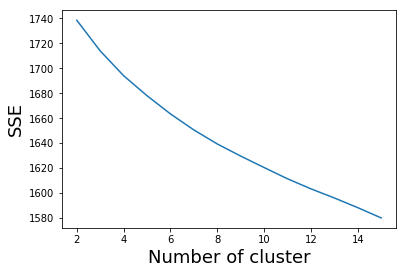

In [83]:
fig = plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster", fontsize=18)
plt.ylabel("SSE", fontsize=18)
#plt.title('Elbow curve', fontsize=25)
plt.savefig('elbow.eps', format='eps', dpi=90)
plt.show()

In [84]:
sse.values()

dict_values([1738.581886383941, 1713.97742629625, 1694.0958616912849, 1678.04224406228, 1663.4541880939423, 1650.5984599330159, 1639.336733171814, 1629.6304930444983, 1620.425236915452, 1611.4023664781787, 1603.336111053774, 1596.026138264945, 1588.2465911296663, 1580.0154899977952])

In [85]:
class Point:
    def __init__(self,initx,inity):
        self.x = initx
        self.y = inity
    def distance_to_line(self, p1, p2):
        x_diff = p2.x - p1.x
        y_diff = p2.y - p1.y
        num = abs(y_diff*self.x - x_diff*self.y + p2.x*p1.y - p2.y*p1.x)
        den = math.sqrt(y_diff**2 + x_diff**2)
        return num / den

In [86]:
distances = []
p1 = Point(initx=range_n_clusters[0],inity=sse[range_n_clusters[0]])
p2 = Point(initx=range_n_clusters[-1],inity=sse[range_n_clusters[-1]])

In [87]:
for i in range_n_clusters:
    p = Point(initx=i,inity=sse[i])
    distances.append(p.distance_to_line(p1,p2))

In [88]:
distances

[0.0,
 1.013785060021191,
 1.6416602690072166,
 1.9567522600147158,
 2.1520925681362213,
 2.205883615100661,
 2.1294281120477416,
 1.9258731173025272,
 1.6813825014219081,
 1.4219890710706795,
 1.0844302105369776,
 0.6850751657974247,
 0.3240892458355081,
 2.2866218153489336e-14]

In [89]:
best_cluster = range_n_clusters[np.argmax(distances)]

In [90]:
best_cluster

7

In [66]:
km = KMeans(n_clusters=best_cluster, max_iter=1000, n_jobs=4, random_state=10).fit(dataset)

In [67]:
d = km.transform(dataset)

In [68]:
def remove_outliers(arr, k):
    mu, sigma = np.mean(arr, axis=0), np.std(arr, axis=0, ddof=1)
    return arr[np.all(np.abs((arr - mu) / sigma) < k, axis=1)]

def remove_outliers_bis(arr, k):
    mask = np.ones((arr.shape[0],), dtype=np.bool)
    mu, sigma = np.mean(arr, axis=0), np.std(arr, axis=0, ddof=1)
    for j in range(arr.shape[1]):
        col = arr[:, j]
        mask[mask] &= np.abs((col[mask] - mu[j]) / sigma[j]) < k
    return arr[mask]

In [ ]:
ind = np.argsort(d)[::][:5]

In [ ]:
ind

In [ ]:
closest, distances = metrics.pairwise_distances_argmin_min(km.cluster_centers_, dataset)

In [ ]:
closest

In [ ]:
for j in closest:
    for i in dataset:
        dist = np.linalg.norm(dataset.iloc[closest] - dataset.iloc[i])

In [ ]:
dist

In [ ]:
distances

In [ ]:
silhouette = metrics.silhouette_score(dataset, km.labels_)

In [ ]:
silhouette

In [ ]:
health_lines = []
with open('health-dataset/health.txt', 'r') as health_txt:
    health_aux = health_txt.readlines()
    health_aux.pop(0)
    for i in health_aux:
        health_lines.append(i.split('|')[-1])
prediction = km.predict(dataset[:])
labels = km.labels_
# print(prediction)
count = 0
for i in labels:
    if i == 1:
        print("Cluster {}: {}".format(i, health_lines[count]))
    count += 1

In [ ]:
for i in enumerate(closest):
    print('Cluster {}: {}'.format(i[0], health_lines[i[1]]))